In [1]:
#Import Necessary Liabraries for predection

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np                                           #For data manipulation and numerical operations.
import matplotlib.pyplot as plt                              #For data visualization.
import matplotlib.ticker as ticker
import seaborn as sns                                        #For data visualization.
from sklearn.model_selection import train_test_split         #To split the dataset into training and testing sets.
from sklearn.linear_model import LogisticRegression          #To create and train a logistic regression model.
from sklearn.metrics import accuracy_score                   #To evaluate the accuracy of the model.
import warnings
warnings.filterwarnings('ignore')                            #Suppresses warnings that might clutter the output.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/snehuuu28/MYDAILYWORK/main/SALES%20PREDICTION/car_purchasing.csv', encoding='ISO-8859-1')  


In [4]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.shape

(500, 9)

In [7]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [10]:
df.shape

(500, 9)

In [11]:
df.gender.value_counts()

gender
1    253
0    247
Name: count, dtype: int64

In [12]:
df['country'].value_counts().head(10)

country
Israel              6
Mauritania          6
Bolivia             6
Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Name: count, dtype: int64

In [13]:
df.age.describe()

count    500.000000
mean      46.241674
std        7.978862
min       20.000000
25%       40.949969
50%       46.049901
75%       51.612263
max       70.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

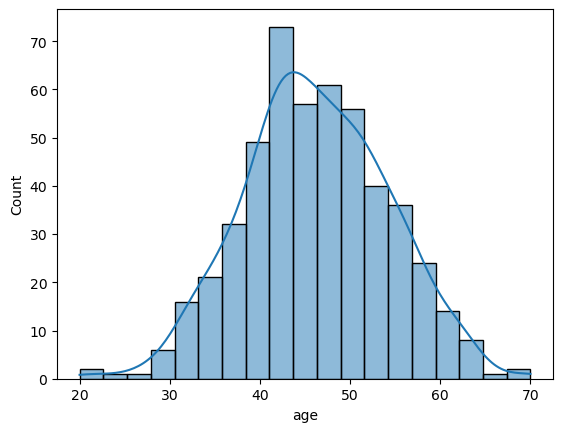

In [14]:
sns.histplot(df['age'],kde=True)

In [15]:
df['annual Salary'].describe()

count       500.000000
mean      62127.239608
std       11703.378228
min       20000.000000
25%       54391.977195
50%       62915.497035
75%       70117.862005
max      100000.000000
Name: annual Salary, dtype: float64

<Axes: xlabel='annual Salary', ylabel='Count'>

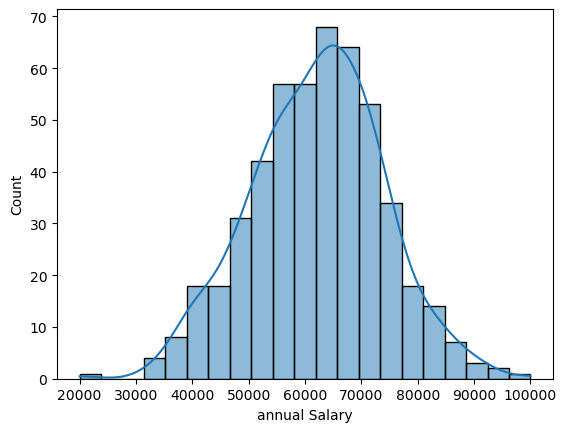

In [16]:
sns.histplot(df['annual Salary'],kde=True)

In [17]:
df.corr(numeric_only=True)

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [18]:
df.groupby(['gender'])['car purchase amount'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,247.0,44933.131928,10325.991917,9000.00000,38788.134815,44463.30502,51508.84770,70878.29664
1,253.0,43503.620644,11167.769115,10092.22509,36645.560900,42909.27129,51046.42226,80000.00000


<Axes: xlabel='age', ylabel='car purchase amount'>

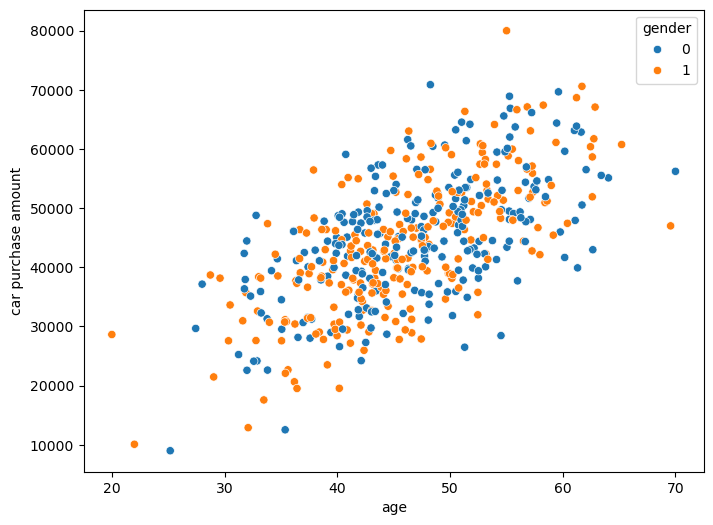

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='car purchase amount', hue='gender',data=df)

<Axes: xlabel='annual Salary', ylabel='car purchase amount'>

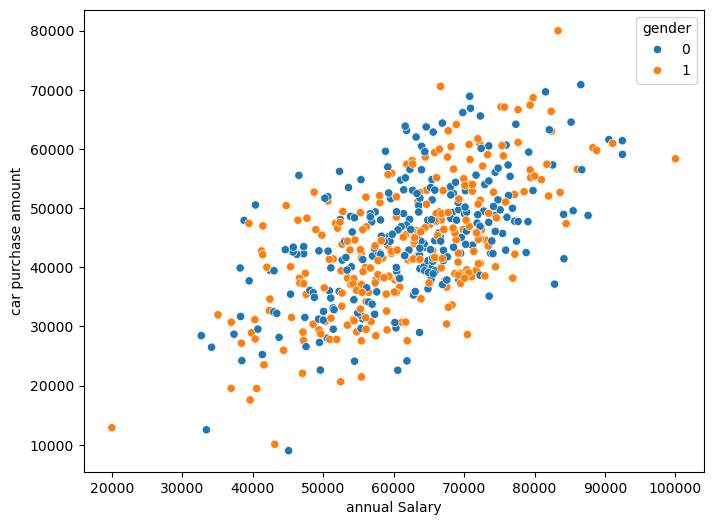

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='annual Salary',y='car purchase amount',hue='gender',data=df)

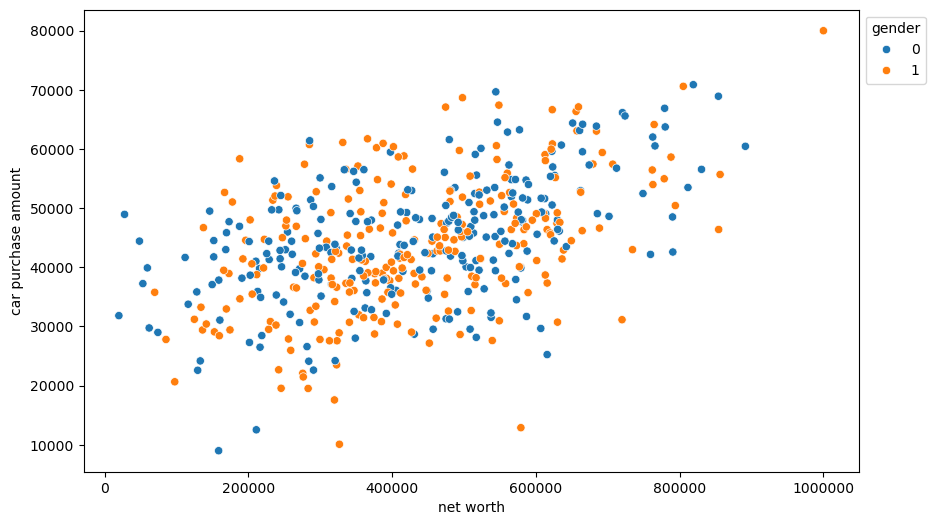

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net worth',y='car purchase amount',hue='gender',data=df)
plt.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
# Change x-axis to display normal numbers
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')

In [22]:
df.drop(columns=['customer name','customer e-mail','country','gender','credit card debt'],inplace=True)

In [23]:
df

,age,annual Salary,net worth,car purchase amount
0,41.851720,62812.09301,238961.2505,35321.45877
1,40.870623,66646.89292,530973.9078,45115.52566
2,43.152897,53798.55112,638467.1773,42925.70921
3,58.271369,79370.03798,548599.0524,67422.36313
4,57.313749,59729.15130,560304.0671,55915.46248
...,...,...,...,...
495,41.462515,71942.40291,541670.1016,48901.44342
496,37.642000,56039.49793,360419.0988,31491.41457
497,53.943497,68888.77805,764531.3203,64147.28888
498,59.160509,49811.99062,337826.6382,45442.15353


In [24]:
# Select only the numerical columns (excluding the target variable 'Sales')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('car purchase amount')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('car purchase amount', axis=1))

# Convert scaled features back to a DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['car purchase amount'] = df['car purchase amount']  # Add the target variable back

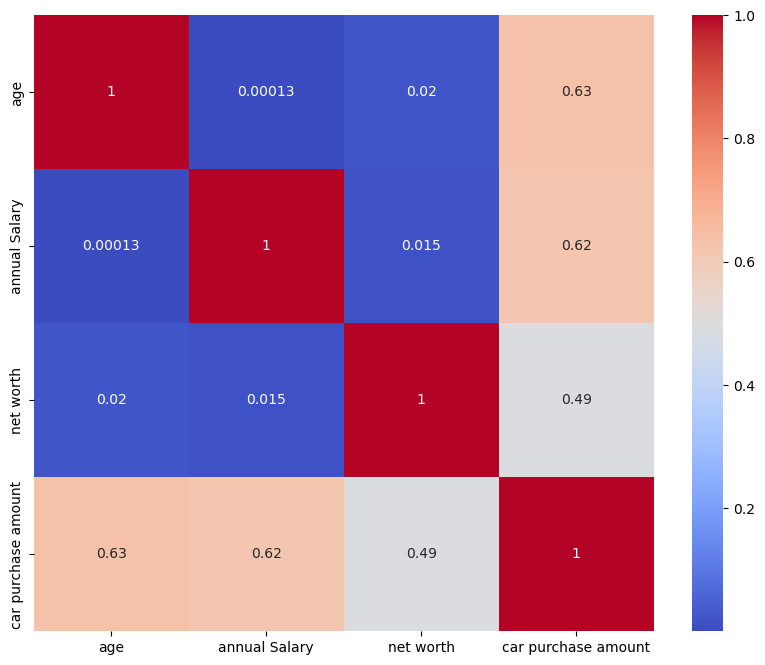

In [25]:
# Correlation matrix to identify important features
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

# Selecting features based on correlation or domain knowledge
X = df_scaled.drop(columns=['car purchase amount'])
y = df_scaled['car purchase amount']


In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(400, 3) (100, 3)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Mean Squared Error and R-Squared values
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

# Evaluate model score (R² on training and testing set)
print(f"Train R-Squared: {model.score(X_train, y_train)}")  # R-squared for the training data
print(f"Test R-Squared: {model.score(X_test, y_test)}")    # R-squared for the test data


Mean Squared Error: 3913700.9094355786
R-Squared: 0.9637530204077491
Train R-Squared: 0.9923578021255736
Test R-Squared: 0.9637530204077491
